In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer


In [2]:
#df = pd.read_csv('/content/drive/MyDrive/SEM VII/LY Project/Atrition/Dataset/HR_Analytics.csv')
df = pd.read_excel('HR_Analytics.xlsx')

In [3]:
df.head()

,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,EmployeeCount,YearsSinceLastPromotion,YearsWithCurrManager,City,EverBenched,ExperienceInCurrentDomain
0,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,405,3,...,2,3,0,0,1,0,0.0,Bangalore,No,0
1,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,411,4,...,2,3,0,0,1,0,0.0,Pune,No,3
2,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,614,2,...,3,3,0,0,1,0,0.0,New Delhi,No,2
3,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1012,2,...,2,3,0,0,1,0,0.0,Bangalore,No,5
4,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1156,3,...,0,3,0,0,1,0,0.0,Pune,Yes,2


In [4]:
df.shape

(1480, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AgeGroup                   1480 non-null   object 
 1   Attrition                  1480 non-null   object 
 2   BusinessTravel             1480 non-null   object 
 3   DailyRate                  1480 non-null   int64  
 4   Department                 1480 non-null   object 
 5   DistanceFromHome           1480 non-null   int64  
 6   Education                  1480 non-null   int64  
 7   EducationField             1480 non-null   object 
 8   EmployeeNumber             1480 non-null   int64  
 9   EnvironmentSatisfaction    1480 non-null   int64  
 10  Gender                     1480 non-null   object 
 11  Age                        1480 non-null   int64  
 12  HourlyRate                 1480 non-null   int64  
 13  JobInvolvement             1480 non-null   int64

In [6]:
df.isnull().sum()

AgeGroup                      0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
Age                           0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
EmpID                         0
MonthlyIncome                 0
SalarySlab                    0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
Training

In [7]:
print(f'{round(57/1480*100,2)} % data is missing in YearsWithCurrManager')

3.85 % data is missing in YearsWithCurrManager


In [8]:
df['YearsWithCurrManager'].dtype

dtype('float64')

In [9]:
df['YearsWithCurrManager'].describe()

count    1423.000000
mean        4.118060
std         3.555484
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

In [10]:
# imputer = SimpleImputer(strategy='mean')
# df['YearsWithCurrManager'] = imputer.fit_transform(df[['YearsWithCurrManager']])


In [11]:
df['YearsWithCurrManager'] = df['YearsWithCurrManager'].fillna(4)

In [12]:
df.isnull().sum()

AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
Age                          0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
EmpID                        0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLife

Now we Don't Have any missing Values


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()


0

In [15]:

df.shape

(1480, 41)

In [16]:
explode = [0,0.1]
data = df['Attrition'].value_counts()

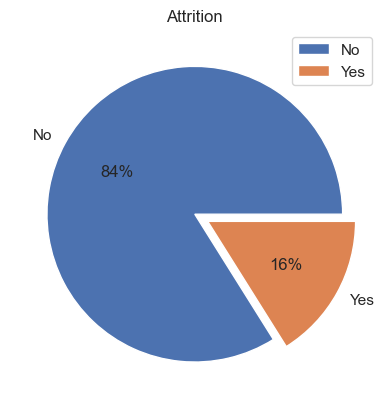

In [17]:
plt.pie(data,labels=data.index,
        explode=explode, autopct='%.0f%%')
plt.legend()
plt.title("Attrition")
plt.show()

In [18]:
df2 = df[df['Attrition']=='Yes']

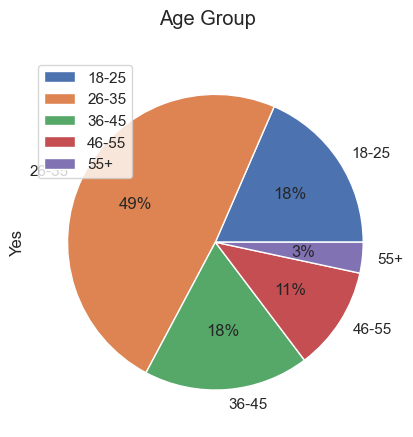

In [19]:
df2.pivot_table(index=['AgeGroup'],columns='Attrition',values='EmpID',aggfunc='count').plot(kind='pie',subplots=True,autopct='%.0f%%' ,title = 'Age Group')
plt.show()

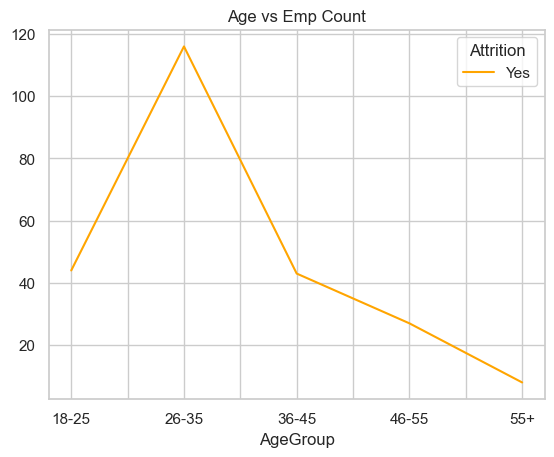

In [20]:
df2.pivot_table(index=['AgeGroup'],columns='Attrition',values='EmpID',aggfunc='count').plot(kind='line',color='orange')
plt.title('Age vs Emp Count')
plt.show()

In [21]:
df2.pivot_table(index='SalarySlab',columns='Attrition',values='EmpID',aggfunc='count').sort_values(by='SalarySlab',ascending=False)

Attrition,Yes
SalarySlab,
Upto 5k,163
5k-10k,49
15k+,5
10k-15k,21


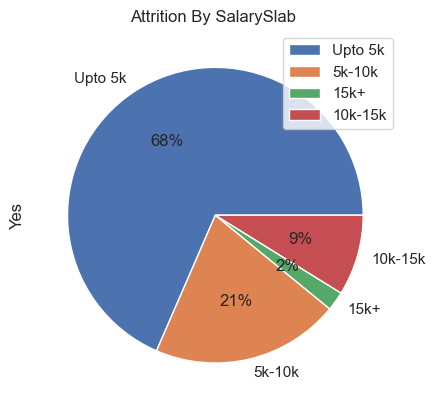

In [22]:
df2.pivot_table(index='SalarySlab',columns='Attrition',values='EmpID',aggfunc='count').sort_values(by='SalarySlab',ascending=False).plot(kind='pie',subplots=True,autopct='%.0f%%')
plt.title('Attrition By SalarySlab ')
plt.show()

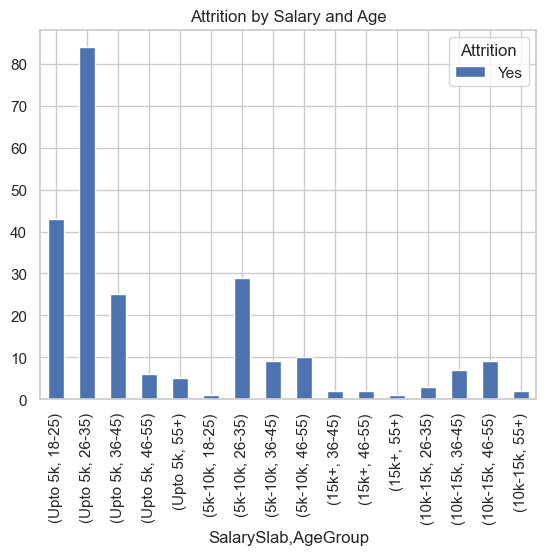

In [23]:
df2.pivot_table(index=['SalarySlab','AgeGroup'],columns='Attrition',values='EmpID',aggfunc='count').sort_values(by='SalarySlab',ascending=False).plot(kind='bar')
plt.title('Attrition by Salary and Age')
plt.show()

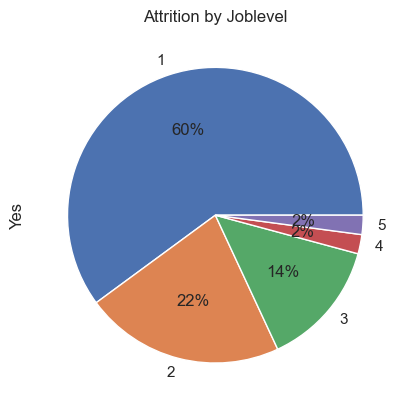

In [24]:
df2.pivot_table(index='JobLevel',columns='Attrition',values='EmpID',aggfunc='count').plot(kind='pie',subplots=True,autopct='%.0f%%',legend = None)
plt.title('Attrition by Joblevel')
plt.show()

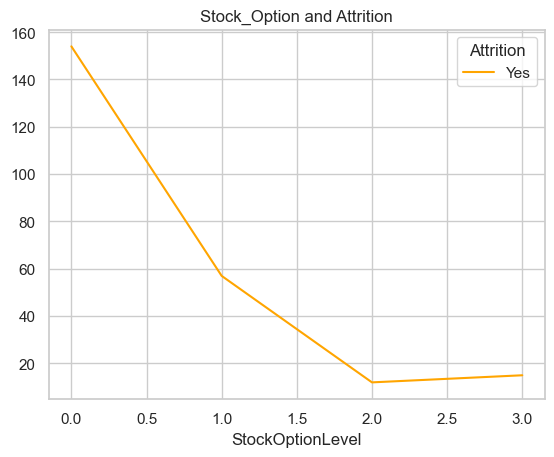

In [25]:
df2.pivot_table(index='StockOptionLevel',columns='Attrition',values='EmpID',aggfunc='count').plot(kind='line',color='orange')
plt.title('Stock_Option and Attrition')
plt.show()

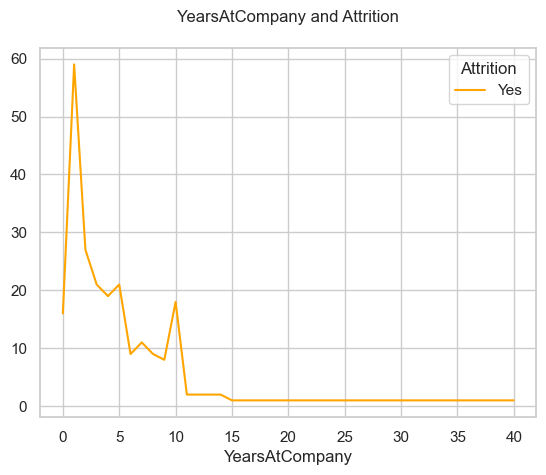

In [26]:
df2.pivot_table(index='YearsAtCompany',columns='Attrition',values='EmpID',aggfunc='count').plot(kind='line',color='orange')
plt.title('YearsAtCompany and Attrition\n')
plt.show()

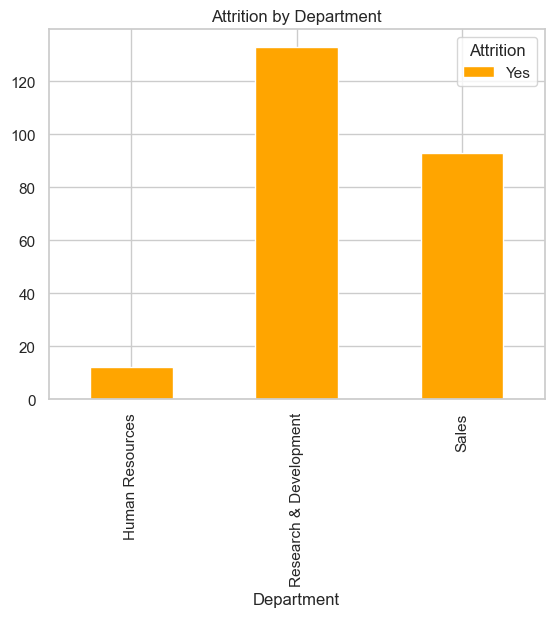

In [27]:
df2.pivot_table(index='Department',columns='Attrition',values='EmpID',aggfunc='count').plot(kind='bar',color='orange')
plt.title('Attrition by Department')
plt.show()

In [28]:
df2.pivot_table(index=['EducationField'],columns='Attrition',values='EmpID',aggfunc='count')

Attrition,Yes
EducationField,
Human Resources,7
Life Sciences,89
Marketing,36
Medical,63
Other,11
Technical Degree,32


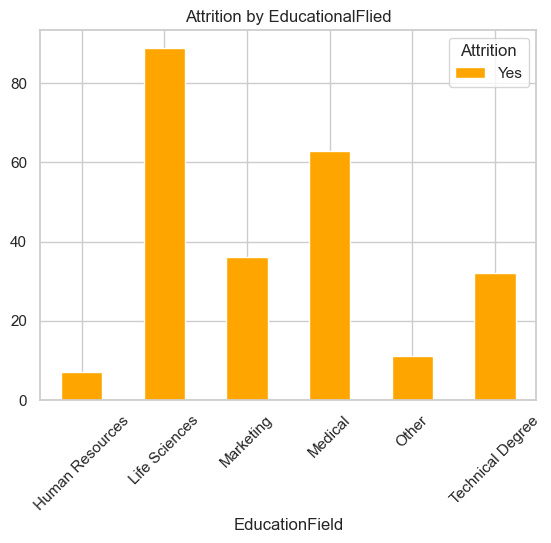

In [29]:
df2.pivot_table(index=['EducationField'],columns='Attrition',values='EmpID',aggfunc='count').plot(kind='bar',color='orange')
plt.title('Attrition by EducationalFlied')
plt.xticks(rotation=45)
plt.show()

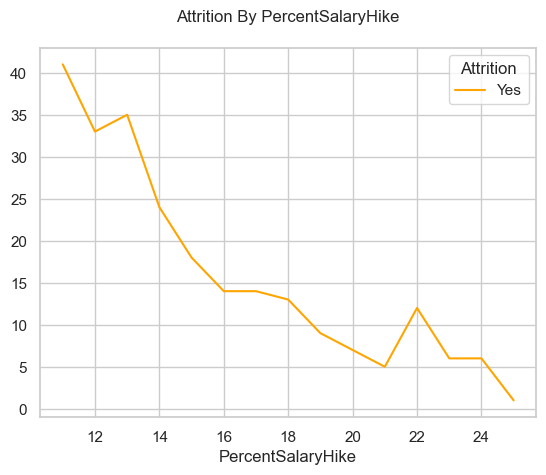

In [30]:
df2.pivot_table(index='PercentSalaryHike',columns='Attrition',values='EmpID',aggfunc='count').plot(kind='line',color='orange')
plt.title('Attrition By PercentSalaryHike\n')
plt.show()

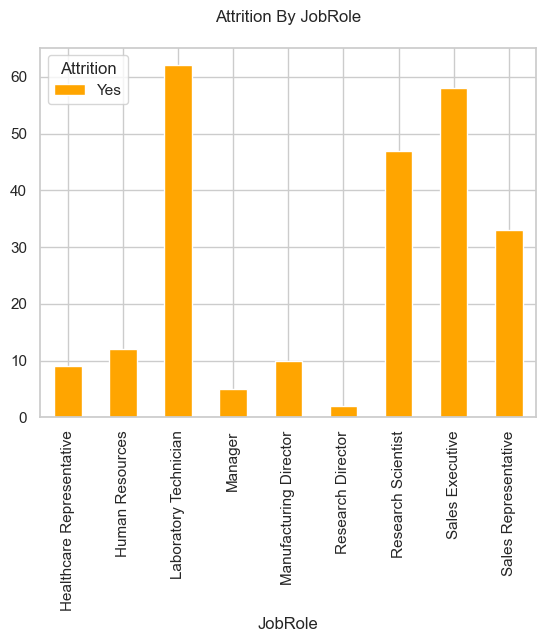

In [31]:
df2.pivot_table(index='JobRole',columns='Attrition',values='EmpID',aggfunc='count').plot(kind='bar',color='orange')
plt.title('Attrition By JobRole\n')
plt.show()

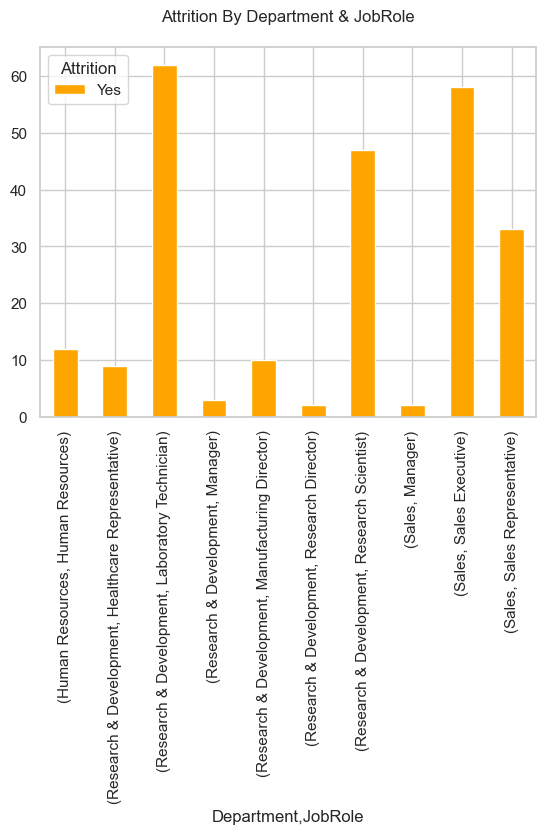

In [32]:
df2.pivot_table(index=['Department','JobRole'],columns='Attrition',values='EmpID',aggfunc='count').plot(kind='bar',color='orange')
plt.title('Attrition By Department & JobRole\n')
plt.show()

In [33]:
df1 = df.copy()
df1.drop(columns=['EmpID','AgeGroup','EmployeeCount','Over18','SalarySlab','OverTime'],inplace = True)

In [34]:
df1.shape

(1480, 35)

In [35]:
df1['Attrition'] = df1['Attrition'].map({'Yes': 1, 'No': 0})
df1['EverBenched'] = df1['EverBenched'].map({'Yes': 1, 'No': 0})

In [36]:
num_cols = df1.select_dtypes(include = np.number)
cag_cols = df1.select_dtypes(exclude = np.number)

In [37]:
num_cols.shape

(1480, 28)

In [38]:
cag_cols.shape

(1480, 7)

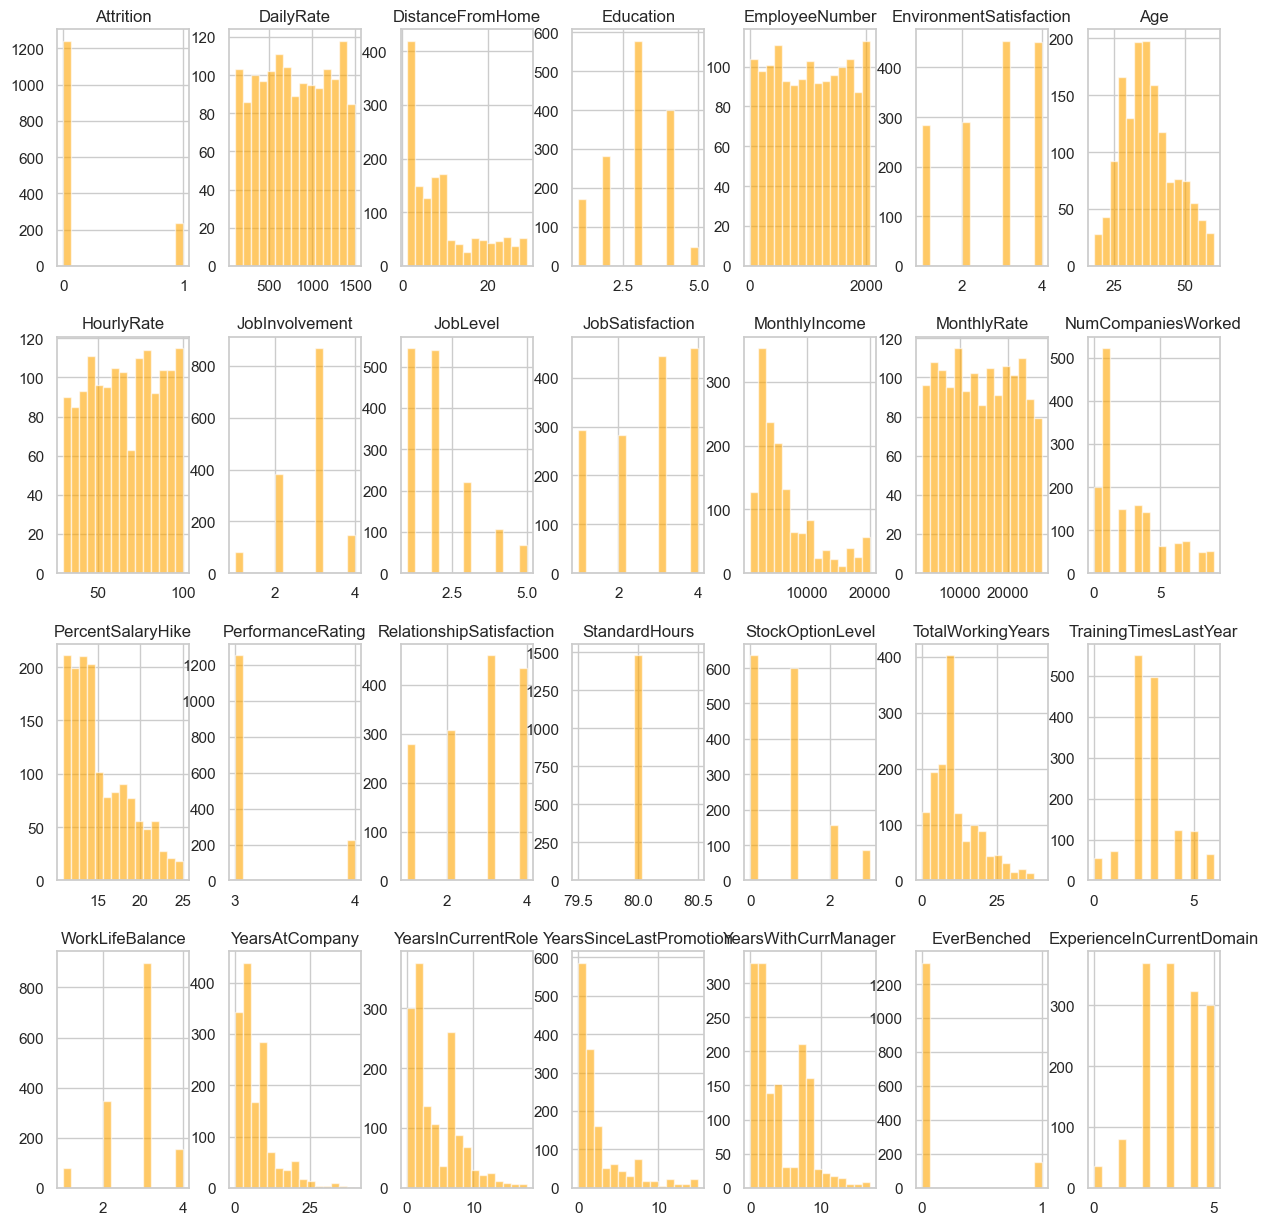

In [39]:
a = num_cols[num_cols.columns].hist(bins=15, figsize=(15,35), layout=(9,7),color = 'orange',alpha=0.6)


In [40]:
num_cols.columns

Index(['Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Age', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EverBenched',
       'ExperienceInCurrentDomain'],
      dtype='object')

In [41]:
cag_cols.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'City'],
      dtype='object')

In [42]:
df1['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1042
Travel_Frequently     279
Non-Travel            151
TravelRarely            8
Name: count, dtype: int64

In [43]:
df1['Department'].value_counts()

Department
Research & Development    967
Sales                     450
Human Resources            63
Name: count, dtype: int64

In [44]:
df1['MaritalStatus'].value_counts()

MaritalStatus
Married     679
Single      473
Divorced    328
Name: count, dtype: int64

In [45]:
#df1['OverTime'].value_counts()

In [46]:
ohe = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus','City']

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Attrition                  1480 non-null   int64  
 1   BusinessTravel             1480 non-null   object 
 2   DailyRate                  1480 non-null   int64  
 3   Department                 1480 non-null   object 
 4   DistanceFromHome           1480 non-null   int64  
 5   Education                  1480 non-null   int64  
 6   EducationField             1480 non-null   object 
 7   EmployeeNumber             1480 non-null   int64  
 8   EnvironmentSatisfaction    1480 non-null   int64  
 9   Gender                     1480 non-null   object 
 10  Age                        1480 non-null   int64  
 11  HourlyRate                 1480 non-null   int64  
 12  JobInvolvement             1480 non-null   int64  
 13  JobLevel                   1480 non-null   int64

In [48]:
df_encoded = pd.get_dummies(df1, columns=ohe,drop_first=True)

In [49]:
df_encoded.shape

(1480, 51)

In [50]:
df_encoded.head()

,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Age,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,City_New Delhi,City_Pune
0,1,230,3,3,405,3,18,54,3,1,...,False,False,False,False,False,False,False,True,False,False
1,0,812,10,3,411,4,18,69,2,1,...,False,False,False,False,False,True,False,True,False,True
2,1,1306,5,3,614,2,18,69,3,1,...,False,False,False,False,False,True,False,True,True,False
3,0,287,5,2,1012,2,18,73,3,1,...,False,False,False,True,False,False,False,True,False,False
4,1,247,8,1,1156,3,18,80,3,1,...,False,False,False,False,False,False,False,True,False,True


In [51]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Attrition                          1480 non-null   int64  
 1   DailyRate                          1480 non-null   int64  
 2   DistanceFromHome                   1480 non-null   int64  
 3   Education                          1480 non-null   int64  
 4   EmployeeNumber                     1480 non-null   int64  
 5   EnvironmentSatisfaction            1480 non-null   int64  
 6   Age                                1480 non-null   int64  
 7   HourlyRate                         1480 non-null   int64  
 8   JobInvolvement                     1480 non-null   int64  
 9   JobLevel                           1480 non-null   int64  
 10  JobSatisfaction                    1480 non-null   int64  
 11  MonthlyIncome                      1480 non-null   int64

In [52]:
X = df_encoded.drop(columns='Attrition')
y = df_encoded['Attrition']

In [53]:
X.shape

(1480, 50)

In [54]:
y.shape

(1480,)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

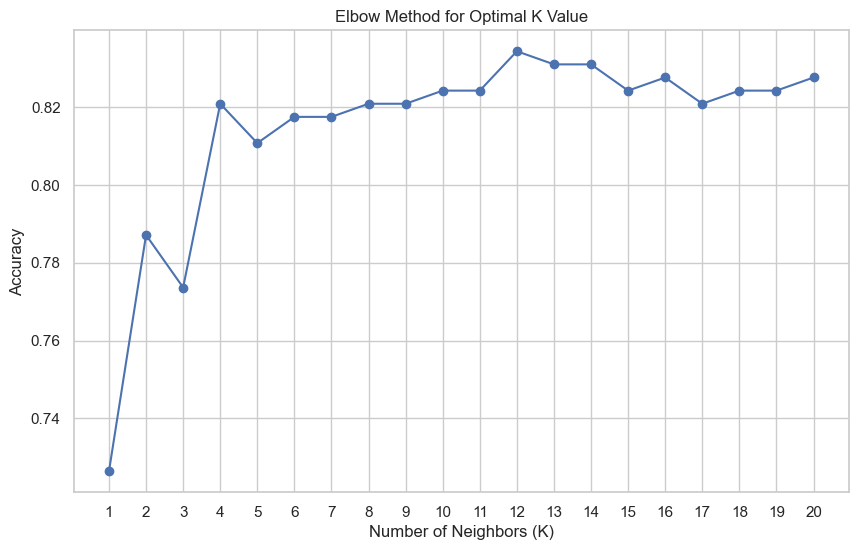

In [57]:
# Try different values of k
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.77
Confusion Matrix:
[[211  34]
 [ 35  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       245
           1       0.32      0.31      0.32        51

    accuracy                           0.77       296
   macro avg       0.59      0.59      0.59       296
weighted avg       0.77      0.77      0.77       296



In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.83
Confusion Matrix:
[[245   0]
 [ 50   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       1.00      0.02      0.04        51

    accuracy                           0.83       296
   macro avg       0.92      0.51      0.47       296
weighted avg       0.86      0.83      0.76       296



Accuracy: 0.87
Confusion Matrix:
[[245   0]
 [ 39  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       245
           1       1.00      0.24      0.38        51

    accuracy                           0.87       296
   macro avg       0.93      0.62      0.65       296
weighted avg       0.89      0.87      0.83       296



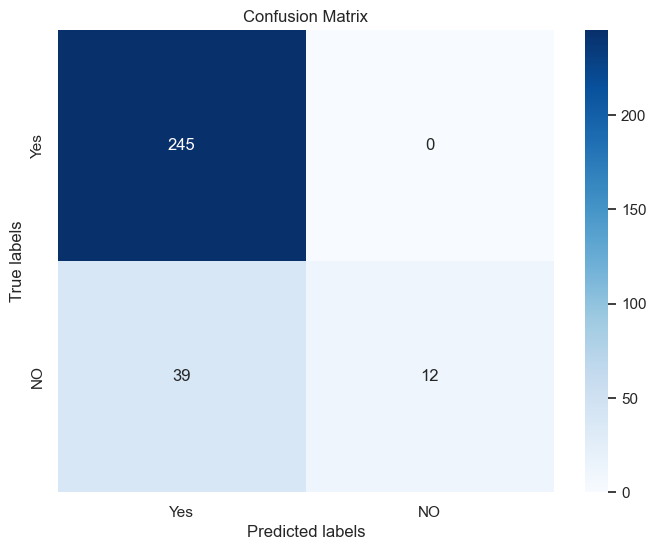

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Yes','NO'], yticklabels=['Yes','NO'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [61]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

svc_model = SVC()

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.83
Confusion Matrix:
[[245   0]
 [ 51   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        51

    accuracy                           0.83       296
   macro avg       0.41      0.50      0.45       296
weighted avg       0.69      0.83      0.75       296



Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       245
           1       0.53      0.31      0.40        51

    accuracy                           0.83       296
   macro avg       0.70      0.63      0.65       296
weighted avg       0.81      0.83      0.82       296



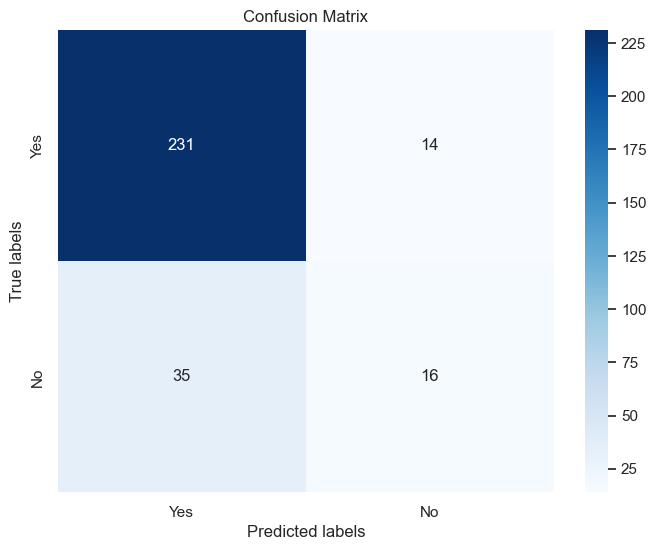

In [62]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create XGBoost Classifier model
xgb_classifier = xgb.XGBClassifier()

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{class_report}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Yes','No'], yticklabels=['Yes','No'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Best Parameters: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       245
           1       1.00      0.14      0.24        51

    accuracy                           0.85       296
   macro avg       0.92      0.57      0.58       296
weighted avg       0.87      0.85      0.80       296



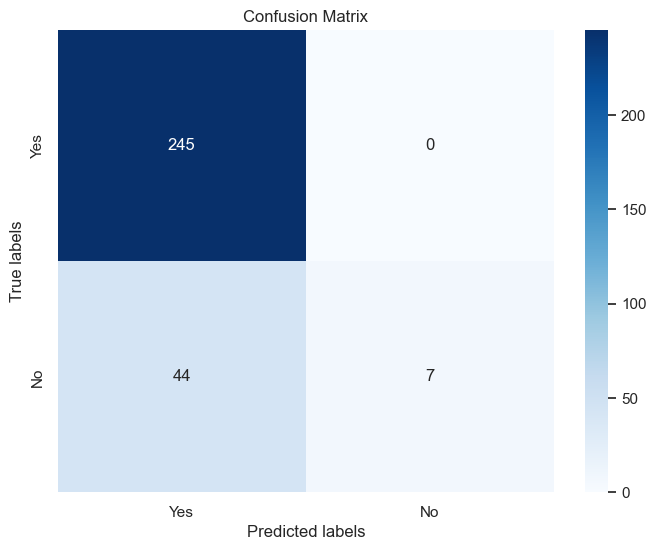

In [63]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.2]
}

# Create XGBoost Classifier model
xgb_classifier = xgb.XGBClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_xgb_classifier = grid_search.best_estimator_

# Make predictions
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{class_report}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Yes','No'], yticklabels=['Yes','No'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [64]:
X

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Age,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,City_New Delhi,City_Pune
0,230,3,3,405,3,18,54,3,1,3,...,False,False,False,False,False,False,False,True,False,False
1,812,10,3,411,4,18,69,2,1,3,...,False,False,False,False,False,True,False,True,False,True
2,1306,5,3,614,2,18,69,3,1,2,...,False,False,False,False,False,True,False,True,True,False
3,287,5,2,1012,2,18,73,3,1,4,...,False,False,False,True,False,False,False,True,False,False
4,247,8,1,1156,3,18,80,3,1,3,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,422,7,3,549,1,60,41,3,5,1,...,True,False,False,False,False,False,True,False,False,False
1476,1499,28,3,573,3,60,80,2,3,1,...,False,False,False,False,True,False,True,False,False,False
1477,1179,16,4,732,1,60,84,3,2,1,...,False,False,False,False,True,False,False,True,True,False
1478,696,7,4,1233,2,60,52,4,2,4,...,False,False,False,False,True,False,False,False,False,True


In [65]:
# Step1 - Apply Scaling to make data mean centric

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xs = X.copy()
xs.iloc[:,0:50] = scaler.fit_transform(X)


In [66]:
xs


,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Age,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,City_New Delhi,City_Pune
0,-1.417860,-0.765246,0.087146,-1.034850,0.252402,-2.07305,-0.582896,0.379185,-0.963504,0.249148,...,-0.272067,-0.332081,-0.239046,-0.496831,-0.534639,-0.245300,-0.920701,1.459097,-0.584632,-0.615882
1,0.026342,0.095926,0.087146,-1.024945,1.167977,-2.07305,0.155242,-1.023800,-0.963504,0.249148,...,-0.272067,-0.332081,-0.239046,-0.496831,-0.534639,4.076647,-0.920701,1.459097,-0.584632,1.623688
2,1.252176,-0.519197,0.087146,-0.689824,-0.663173,-2.07305,0.155242,0.379185,-0.963504,-0.656844,...,-0.272067,-0.332081,-0.239046,-0.496831,-0.534639,4.076647,-0.920701,1.459097,1.710476,-0.615882
3,-1.276417,-0.519197,-0.889941,-0.032787,-0.663173,-2.07305,0.352079,0.379185,-0.963504,1.155139,...,-0.272067,-0.332081,-0.239046,2.012758,-0.534639,-0.245300,-0.920701,1.459097,-0.584632,-0.615882
4,-1.375675,-0.150123,-1.867028,0.204935,0.252402,-2.07305,0.696543,0.379185,-0.963504,0.249148,...,-0.272067,-0.332081,-0.239046,-0.496831,-0.534639,-0.245300,-0.920701,1.459097,-0.584632,1.623688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,-0.941422,-0.273148,0.087146,-0.797128,-1.578749,2.52945,-1.222616,0.379185,2.655749,-1.562835,...,3.675569,-0.332081,-0.239046,-0.496831,-0.534639,-0.245300,1.086129,-0.685355,-0.584632,-0.615882
1476,1.731096,2.310369,0.087146,-0.757508,0.252402,2.52945,0.696543,-1.023800,0.846123,-1.562835,...,-0.272067,-0.332081,-0.239046,-0.496831,1.870422,-0.245300,1.086129,-0.685355,-0.584632,-0.615882
1477,0.937033,0.834074,1.064233,-0.495024,-1.578749,2.52945,0.893380,0.379185,-0.058691,-1.562835,...,-0.272067,-0.332081,-0.239046,-0.496831,1.870422,-0.245300,-0.920701,1.459097,1.710476,-0.615882
1478,-0.261506,-0.273148,1.064233,0.332050,-0.663173,2.52945,-0.681315,1.782171,-0.058691,1.155139,...,-0.272067,-0.332081,-0.239046,-0.496831,1.870422,-0.245300,-0.920701,-0.685355,-0.584632,1.623688


In [67]:
from sklearn.decomposition import PCA


In [68]:
d = {'DT':77,'Log Reg':82,'RFC':86,'SVC':82,'XGB':85}
d

{'DT': 77, 'Log Reg': 82, 'RFC': 86, 'SVC': 82, 'XGB': 85}

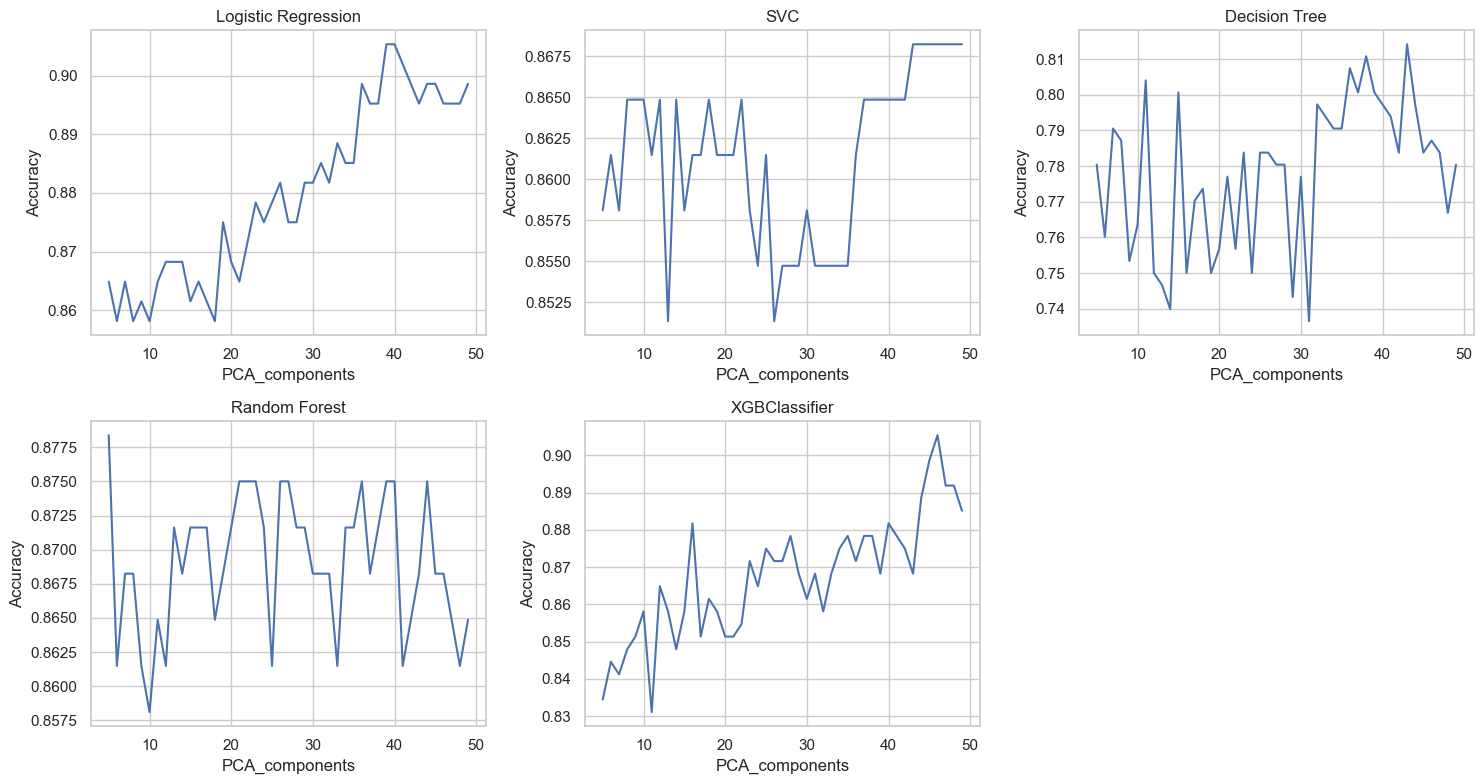

In [69]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def func_1(classifier, n=5):
    acc = []
    pca = PCA(n_components=n)
    pca.fit(xs)
    x_pca = pca.transform(xs)
    X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=2)

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    return acc

n_values = list(range(5, 50))

# List of classifier objects
classifiers = [LogisticRegression(random_state=4),
               SVC(random_state=4),
               DecisionTreeClassifier(random_state=4),
               RandomForestClassifier(random_state=4),
               xgb.XGBClassifier(random_state=4)]

classifier_names = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest','XGBClassifier']

plt.figure(figsize=(15, 8))

for i, classifier in enumerate(classifiers):
    accuracy_values = [func_1(classifier, n)[0] for n in n_values]

    plt.subplot(2, 3, i+1)
    plt.plot(n_values, accuracy_values)
    plt.title(classifier_names[i])
    plt.xlabel('PCA_components')
    plt.ylabel('Accuracy')
    plt.grid(True)

plt.tight_layout()
plt.show()


# Final Model Selection

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xs = X.copy()
xs.iloc[:,0:50] = scaler.fit_transform(X)
xs

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Age,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,City_New Delhi,City_Pune
0,-1.417860,-0.765246,0.087146,-1.034850,0.252402,-2.07305,-0.582896,0.379185,-0.963504,0.249148,...,-0.272067,-0.332081,-0.239046,-0.496831,-0.534639,-0.245300,-0.920701,1.459097,-0.584632,-0.615882
1,0.026342,0.095926,0.087146,-1.024945,1.167977,-2.07305,0.155242,-1.023800,-0.963504,0.249148,...,-0.272067,-0.332081,-0.239046,-0.496831,-0.534639,4.076647,-0.920701,1.459097,-0.584632,1.623688
2,1.252176,-0.519197,0.087146,-0.689824,-0.663173,-2.07305,0.155242,0.379185,-0.963504,-0.656844,...,-0.272067,-0.332081,-0.239046,-0.496831,-0.534639,4.076647,-0.920701,1.459097,1.710476,-0.615882
3,-1.276417,-0.519197,-0.889941,-0.032787,-0.663173,-2.07305,0.352079,0.379185,-0.963504,1.155139,...,-0.272067,-0.332081,-0.239046,2.012758,-0.534639,-0.245300,-0.920701,1.459097,-0.584632,-0.615882
4,-1.375675,-0.150123,-1.867028,0.204935,0.252402,-2.07305,0.696543,0.379185,-0.963504,0.249148,...,-0.272067,-0.332081,-0.239046,-0.496831,-0.534639,-0.245300,-0.920701,1.459097,-0.584632,1.623688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,-0.941422,-0.273148,0.087146,-0.797128,-1.578749,2.52945,-1.222616,0.379185,2.655749,-1.562835,...,3.675569,-0.332081,-0.239046,-0.496831,-0.534639,-0.245300,1.086129,-0.685355,-0.584632,-0.615882
1476,1.731096,2.310369,0.087146,-0.757508,0.252402,2.52945,0.696543,-1.023800,0.846123,-1.562835,...,-0.272067,-0.332081,-0.239046,-0.496831,1.870422,-0.245300,1.086129,-0.685355,-0.584632,-0.615882
1477,0.937033,0.834074,1.064233,-0.495024,-1.578749,2.52945,0.893380,0.379185,-0.058691,-1.562835,...,-0.272067,-0.332081,-0.239046,-0.496831,1.870422,-0.245300,-0.920701,1.459097,1.710476,-0.615882
1478,-0.261506,-0.273148,1.064233,0.332050,-0.663173,2.52945,-0.681315,1.782171,-0.058691,1.155139,...,-0.272067,-0.332081,-0.239046,-0.496831,1.870422,-0.245300,-0.920701,-0.685355,-0.584632,1.623688


In [71]:
y.shape

(1480,)

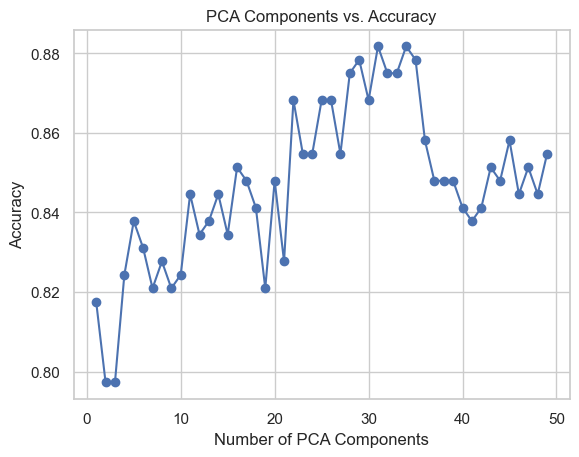

In [72]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Initialize lists to store PCA components and accuracies
components = []
accuracies = []

# Iterate over different numbers of PCA components
for n_components in range(1, 50):
    # Perform PCA
    pca = PCA(n_components=n_components)
    pca.fit(xs)
    x_pca = pca.transform(xs)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=4)

    # Initialize and train XGBoost classifier
    xgb_clf = xgb.XGBClassifier(
        gamma=0,
        learning_rate=0.2,
        max_depth=5,
        n_estimators=100
    )
    xgb_clf.fit(X_train, y_train)

    # Predict on test set and calculate accuracy
    y_pred = xgb_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append results to lists
    components.append(n_components)
    accuracies.append(accuracy)

# Plot PCA components vs. accuracy
plt.plot(components, accuracies, marker='o')
plt.title('PCA Components vs. Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [109]:
pca = PCA(n_components=34)
pca.fit(xs)
x_pca = pca.transform(xs)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=4)

# Initialize and train XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    gamma=0,
    learning_rate=0.2,
    max_depth=5,
    n_estimators=100,
    random_state=4
)
xgb_clf.fit(X_train, y_train)

# Predict on test set and calculate accuracy
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy



0.8817567567567568

In [110]:
import pickle
with open('xgb_clf.pickle_1', 'wb') as file:
    pickle.dump(xgb_clf, file)

In [73]:
for i,j in zip(accuracies,components):
    if i>=0.88:
        print(f'acc : {i} and n :{j}')

acc : 0.8817567567567568 and n :31
acc : 0.8817567567567568 and n :34


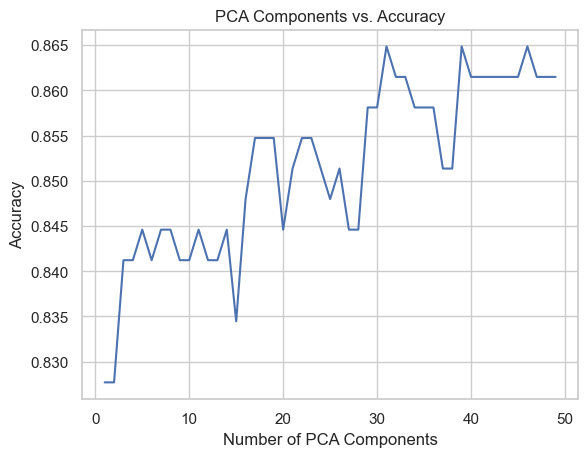

In [74]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Initialize lists to store PCA components and accuracies
components_1 = []
accuracies_1 = []

# Iterate over different numbers of PCA components
for n_components in range(1, 50):
    # Perform PCA
    pca = PCA(n_components=n_components)
    pca.fit(xs)
    x_pca = pca.transform(xs)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=4)

    # Initialize and train XGBoost classifier
    xgb_clf = LogisticRegression(random_state=4)
    xgb_clf.fit(X_train, y_train)

    # Predict on test set and calculate accuracy
    y_pred = xgb_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append results to lists
    components_1.append(n_components)
    accuracies_1.append(accuracy)

# Plot PCA components vs. accuracy
plt.plot(components_1, accuracies_1, marker='')
plt.title('PCA Components vs. Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [75]:
for i,j in zip(accuracies_1,components_1):
    if i>=0.87:
        print(f'acc : {i} and n :{j}')

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(xs)
x_pca = pca.transform(xs)
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=4)

In [77]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1184, 20)
(296, 20)
(1184,)
(296,)


In [78]:
xs

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Age,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,City_New Delhi,City_Pune
0,-1.417860,-0.765246,0.087146,-1.034850,0.252402,-2.07305,-0.582896,0.379185,-0.963504,0.249148,...,-0.272067,-0.332081,-0.239046,-0.496831,-0.534639,-0.245300,-0.920701,1.459097,-0.584632,-0.615882
1,0.026342,0.095926,0.087146,-1.024945,1.167977,-2.07305,0.155242,-1.023800,-0.963504,0.249148,...,-0.272067,-0.332081,-0.239046,-0.496831,-0.534639,4.076647,-0.920701,1.459097,-0.584632,1.623688
2,1.252176,-0.519197,0.087146,-0.689824,-0.663173,-2.07305,0.155242,0.379185,-0.963504,-0.656844,...,-0.272067,-0.332081,-0.239046,-0.496831,-0.534639,4.076647,-0.920701,1.459097,1.710476,-0.615882
3,-1.276417,-0.519197,-0.889941,-0.032787,-0.663173,-2.07305,0.352079,0.379185,-0.963504,1.155139,...,-0.272067,-0.332081,-0.239046,2.012758,-0.534639,-0.245300,-0.920701,1.459097,-0.584632,-0.615882
4,-1.375675,-0.150123,-1.867028,0.204935,0.252402,-2.07305,0.696543,0.379185,-0.963504,0.249148,...,-0.272067,-0.332081,-0.239046,-0.496831,-0.534639,-0.245300,-0.920701,1.459097,-0.584632,1.623688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,-0.941422,-0.273148,0.087146,-0.797128,-1.578749,2.52945,-1.222616,0.379185,2.655749,-1.562835,...,3.675569,-0.332081,-0.239046,-0.496831,-0.534639,-0.245300,1.086129,-0.685355,-0.584632,-0.615882
1476,1.731096,2.310369,0.087146,-0.757508,0.252402,2.52945,0.696543,-1.023800,0.846123,-1.562835,...,-0.272067,-0.332081,-0.239046,-0.496831,1.870422,-0.245300,1.086129,-0.685355,-0.584632,-0.615882
1477,0.937033,0.834074,1.064233,-0.495024,-1.578749,2.52945,0.893380,0.379185,-0.058691,-1.562835,...,-0.272067,-0.332081,-0.239046,-0.496831,1.870422,-0.245300,-0.920701,1.459097,1.710476,-0.615882
1478,-0.261506,-0.273148,1.064233,0.332050,-0.663173,2.52945,-0.681315,1.782171,-0.058691,1.155139,...,-0.272067,-0.332081,-0.239046,-0.496831,1.870422,-0.245300,-0.920701,-0.685355,-0.584632,1.623688


In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=49)
pca.fit(xs)
x_pca = pca.transform(xs)
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=4)

xgb_clf = xgb.XGBClassifier(randomstate = 4)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8547297297297297


In [80]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       245
           1       0.70      0.27      0.39        51

    accuracy                           0.85       296
   macro avg       0.78      0.63      0.66       296
weighted avg       0.84      0.85      0.83       296



In [81]:
import pickle
with open('xgb_clf.pickle', 'wb') as file:
    pickle.dump(xgb_clf, file)

In [82]:
X

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Age,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,City_New Delhi,City_Pune
0,230,3,3,405,3,18,54,3,1,3,...,False,False,False,False,False,False,False,True,False,False
1,812,10,3,411,4,18,69,2,1,3,...,False,False,False,False,False,True,False,True,False,True
2,1306,5,3,614,2,18,69,3,1,2,...,False,False,False,False,False,True,False,True,True,False
3,287,5,2,1012,2,18,73,3,1,4,...,False,False,False,True,False,False,False,True,False,False
4,247,8,1,1156,3,18,80,3,1,3,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,422,7,3,549,1,60,41,3,5,1,...,True,False,False,False,False,False,True,False,False,False
1476,1499,28,3,573,3,60,80,2,3,1,...,False,False,False,False,True,False,True,False,False,False
1477,1179,16,4,732,1,60,84,3,2,1,...,False,False,False,False,True,False,False,True,True,False
1478,696,7,4,1233,2,60,52,4,2,4,...,False,False,False,False,True,False,False,False,False,True


In [83]:
df_shuffled = df1.sample(frac=1, random_state=42)
random_100_rows = df_shuffled.sample(n=100, random_state=42)  
random_100_rows.drop(columns=['Attrition'],inplace=True)
random_100_rows.head(100)
#random_100_rows.to_excel("demo_data.xlsx", index=False)
#random_100_rows.to_csv("demo_data.csv", index=False)


,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,Age,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,City,EverBenched,ExperienceInCurrentDomain
120,Travel_Rarely,309,Human Resources,2,3,Human Resources,1987,3,Female,25,...,6,3,3,2,0,1,2.0,Bangalore,0,3
196,Travel_Rarely,205,Sales,10,3,Marketing,1403,4,Female,27,...,6,3,3,6,2,4,4.0,Pune,0,2
599,Travel_Rarely,204,Sales,14,3,Technical Degree,666,3,Female,34,...,8,3,3,8,2,0,6.0,Bangalore,0,2
1443,Travel_Rarely,1162,Research & Development,24,2,Life Sciences,1907,1,Male,56,...,5,3,3,4,2,1,0.0,Pune,0,4
169,Travel_Rarely,894,Research & Development,9,3,Medical,260,4,Female,27,...,7,2,2,7,7,0,3.0,New Delhi,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,Travel_Frequently,1249,Research & Development,7,3,Life Sciences,425,1,Male,45,...,24,2,3,24,9,9,11.0,Bangalore,0,3
787,Non-Travel,894,Research & Development,1,4,Medical,1662,4,Female,36,...,4,6,3,3,2,1,2.0,Bangalore,0,2
944,Travel_Rarely,1253,Research & Development,10,1,Medical,1800,3,Male,39,...,9,3,3,4,3,2,2.0,New Delhi,0,4
335,Travel_Frequently,1312,Research & Development,23,3,Life Sciences,159,1,Male,30,...,10,2,2,10,7,0,9.0,Bangalore,0,2


In [84]:
new_df = pd.read_excel('demo_data.xlsx')
new_df.head()

,EmpID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EverBenched,City,ExperienceInCurrentDomain
0,RM297,51,Travel_Rarely,833,Research & Development,1,3,Life Sciences,353,3,...,1,0,2,1,0,0,4,No,Bangalore,0
1,RM302,29,Travel_Rarely,1329,Research & Development,7,3,Life Sciences,1260,3,...,6,2,3,6,0,1,0,No,Pune,3
2,RM458,46,Travel_Rarely,563,Sales,1,4,Life Sciences,1602,4,...,27,5,1,26,0,0,12,No,New Delhi,2
3,RM728,41,Travel_Rarely,509,Research & Development,7,2,Technical Degree,1085,2,...,10,3,3,10,6,0,8,No,Bangalore,5
4,RM829,25,Travel_Rarely,959,Sales,28,3,Life Sciences,183,1,...,6,3,3,2,2,2,4,Yes,Pune,2


In [85]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
with open('xgb_clf.pickle', 'rb') as f:
    model = pickle.load(f)

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()
pca = PCA(n_components=20)



In [86]:
ohe

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'City']

In [87]:
from sklearn.compose import ColumnTransformer
# OHE
trf1 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),ohe)
],remainder='passthrough')

# Scaling
trf2 = ColumnTransformer([
    ('scale',StandardScaler())
])


# Model
trf3 = model

pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
  ])



In [88]:
df1.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,City,EverBenched,ExperienceInCurrentDomain
0,1,Travel_Rarely,230,Research & Development,3,3,Life Sciences,405,3,Male,...,0,2,3,0,0,0,0.0,Bangalore,0,0
1,0,Travel_Rarely,812,Sales,10,3,Medical,411,4,Female,...,0,2,3,0,0,0,0.0,Pune,0,3
2,1,Travel_Frequently,1306,Sales,5,3,Marketing,614,2,Male,...,0,3,3,0,0,0,0.0,New Delhi,0,2
3,0,Non-Travel,287,Research & Development,5,2,Life Sciences,1012,2,Male,...,0,2,3,0,0,0,0.0,Bangalore,0,5
4,1,Non-Travel,247,Research & Development,8,1,Medical,1156,3,Male,...,0,0,3,0,0,0,0.0,Pune,1,2


In [89]:
df1.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'Age', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'City', 'EverBenched', 'ExperienceInCurrentDomain'],
      dtype='object')

In [90]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Attrition']),
                                                 df['Attrition'],
                                                 test_size=0.2,
                                                random_state=42)

In [91]:
ohe

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'City']

In [92]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb

# Load your trained XGBoost classifier
with open('xgb_clf.pickle', 'rb') as f:
    xgb_clf = pickle.load(f)

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('encoder', OneHotEncoder()),  # One-hot encode categorical features
    ('scaler', StandardScaler()),  # Standardize features
    ('pca', PCA(n_components=2)),  # Perform PCA to reduce dimensionality
    ('model', xgb_clf)  # Use the loaded XGBoost classifier
])

# Fit the pipeline with your training data
pipeline.fit(X_train, y_train)

# Export the pipeline to a pickle file for later use
with open('pipeline.pickle', 'wb') as f:
    pickle.dump(pipeline, f)


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '26-35'

In [118]:
nd = '''[
    {"EmpID":"RM018","name":"Priya Sharma","email":"priya.sharma2@example.com","phone":"1234567890","Gender":"Female"},
    {"EmpID":"RM021","name":"Rakesh Kumar","email":"rakesh.kumar@example.com","phone":"9786543210","Gender":"Male"},
    {"EmpID":"RM024","name":"Rajeshwari Devi","email":"rajeshwari.devi2@example.com","phone":"5432109876","Gender":"Female"},
    {"EmpID":"RM035","name":"Amit Patel","email":"amit.patel@example.com","phone":"8765432109","Gender":"Male"},
    {"EmpID":"RM087","name":"Sangeeta Singh","email":"sangeeta.singh3@example.com","phone":"3456789012","Gender":"Female"},
    {"EmpID":"RM097","name":"Suresh Sharma","email":"suresh.sharma@example.com","phone":"7654321098","Gender":"Male"},
    {"EmpID":"RM1026","name":"Anita Gupta","email":"anita.gupta@example.com","phone":"6543210987","Gender":"Female"},
    {"EmpID":"RM103","name":"Sunita Singh","email":"sunita.singh@example.com","phone":"7890123456","Gender":"Female"},
    {"EmpID":"RM1061","name":"Rahul Singh","email":"rahul.singh@example.com","phone":"5432109876","Gender":"Male"},
    {"EmpID":"RM1062","name":"Priya Mishra","email":"priya.mishra@example.com","phone":"4321098765","Gender":"Female"},
    {"EmpID":"RM108","name":"Deepak Verma","email":"deepak.verma@example.com","phone":"3210987654","Gender":"Male"},
    {"EmpID":"RM1083","name":"Neha Joshi","email":"neha.joshi@example.com","phone":"2109876543","Gender":"Female"},
    {"EmpID":"RM109","name":"Rakesh Shah","email":"rakesh.shah@example.com","phone":"9012345678","Gender":"Male"},
    {"EmpID":"RM1098","name":"Pooja Patel","email":"pooja.patel@example.com","phone":"8901234567","Gender":"Female"},
    {"EmpID":"RM110","name":"Sanjay Singh","email":"sanjay.singh@example.com","phone":"9876543210","Gender":"Male"},
    {"EmpID":"RM1128","name":"Aarti Gupta","email":"aarti.gupta@example.com","phone":"7890123456","Gender":"Female"},
    {"EmpID":"RM1138","name":"Neha Devi","email":"neha.devi2@example.com","phone":"7890123456","Gender":"Female"},
    {"EmpID":"RM114","name":"Vijay Kumar","email":"vijay.kumar@example.com","phone":"6789012345","Gender":"Male"},
    {"EmpID":"RM1153","name":"Ankit Singh","email":"ankit.singh@example.com","phone":"4567890123","Gender":"Male"},
    {"EmpID":"RM1154","name":"Deepak Verma","email":"deepak.verma@example.com","phone":"3210987654","Gender":"Male"},
    {"EmpID":"RM1169","name":"Naveen Sharma","email":"naveen.sharma@example.com","phone":"5678901234","Gender":"Male"},
    {"EmpID":"RM1179","name":"Manoj Kumar","email":"manoj.kumar@example.com","phone":"7654321098","Gender":"Male"},
    {"EmpID":"RM1198","name":"Sneha Singh","email":"sneha.singh@example.com","phone":"6543210987","Gender":"Female"},
    {"EmpID":"RM1202","name":"Rajni Singh","email":"rajni.singh@example.com","phone":"4567890123","Gender":"Female"},
    {"EmpID":"RM1214","name":"Vivek Kumar","email":"vivek.kumar@example.com","phone":"3456789012","Gender":"Male"},
    {"EmpID":"RM1218","name":"Anjali Gupta","email":"anjali.gupta@example.com","phone":"2345678901","Gender":"Female"},
    {"EmpID":"RM1223","name":"Sanjay Yadav","email":"sanjay.yadav@example.com","phone":"1234567890","Gender":"Male"},
    {"EmpID":"RM1231","name":"Sunita Singh","email":"sunita.singh@example.com","phone":"7890123456","Gender":"Female"},
    {"EmpID":"RM1239","name":"Rajeshwari Devi","email":"rajeshwari.devi@example.com","phone":"6789012345","Gender":"Female"},
    {"EmpID":"RM1246","name":"Vikas Singh","email":"vikas.singh@example.com","phone":"5678901234","Gender":"Male"},
    {"EmpID":"RM1272","name":"Sunita Kumari","email":"sunita.kumari@example.com","phone":"3456789012","Gender":"Female"},
    {"EmpID":"RM1274","name":"Amit Kumar","email":"amit.kumar3@example.com","phone":"6789012345","Gender":"Male"},
    {"EmpID":"RM128","name":"Rakesh Shah","email":"rakesh.shah@example.com","phone":"9012345678","Gender":"Male"},
    {"EmpID":"RM129","name":"Anita Kumari","email":"anita.kumari@example.com","phone":"8765432109","Gender":"Female"},
    {"EmpID":"RM1312","name":"Neha Joshi","email":"neha.joshi@example.com","phone":"2109876543","Gender":"Female"},
    {"EmpID":"RM1340","name":"Preeti Sharma","email":"preeti.sharma2@example.com","phone":"5678901234","Gender":"Female"},
    {"EmpID":"RM139","name":"Preeti Sharma","email":"preeti.sharma@example.com","phone":"4567890123","Gender":"Female"},
    {"EmpID":"RM1408","name":"Avinash Kumar","email":"avinash.kumar@example.com","phone":"3456789012","Gender":"Male"},
    {"EmpID":"RM1409","name":"Geeta Devi","email":"geeta.devi@example.com","phone":"2345678901","Gender":"Female"},
    {"EmpID":"RM1424","name":"Suresh Kumar","email":"suresh.kumar@example.com","phone":"4567890123","Gender":"Male"},
    {"EmpID":"RM1437","name":"Rajesh Yadav","email":"rajesh.yadav@example.com","phone":"2345678901","Gender":"Male"},
    {"EmpID":"RM1439","name":"Kamal Gupta","email":"kamal.gupta@example.com","phone":"1234567890","Gender":"Male"},
    {"EmpID":"RM150","name":"Pooja Patel","email":"pooja.patel@example.com","phone":"8901234567","Gender":"Female"},
    {"EmpID":"RM161","name":"Raj Kumar","email":"raj.kumar@example.com","phone":"7654321098","Gender":"Male"},
    {"EmpID":"RM172","name":"Aarti Gupta","email":"aarti.gupta@example.com","phone":"7890123456","Gender":"Female"},
    {"EmpID":"RM178","name":"Vijay Kumar","email":"vijay.kumar@example.com","phone":"6789012345","Gender":"Male"},
    {"EmpID":"RM207","name":"Neha Singh","email":"neha.singh2@example.com","phone":"6543210987","Gender":"Female"},
    {"EmpID":"RM275","name":"Neha Kumari","email":"neha.kumari@example.com","phone":"4321098765","Gender":"Female"},
    {"EmpID":"RM297","name":"Rajesh Kumar","email":"rajesh.kumar@example.com","phone":"9876543210","Gender":"Male"},
    {"EmpID":"RM302","name":"Amit Patel","email":"amit.patel@example.com","phone":"8765432109","Gender":"Male"},
    {"EmpID":"RM346","name":"Anjali Kumari","email":"anjali.kumari@example.com","phone":"2345678901","Gender":"Female"},
    {"EmpID":"RM358","name":"Rajesh Kumar","email":"rajesh.kumar2@example.com","phone":"3210987654","Gender":"Male"},
    {"EmpID":"RM363","name":"Sangeeta Devi","email":"sangeeta.devi@example.com","phone":"2109876543","Gender":"Female"},
    {"EmpID":"RM371","name":"Amit Kumar","email":"amit.kumar@example.com","phone":"1098765432","Gender":"Male"},
    {"EmpID":"RM381","name":"Neeraj Singh","email":"neeraj.singh@example.com","phone":"9876543210","Gender":"Male"},
    {"EmpID":"RM384","name":"Amit Kumar","email":"amit.kumar2@example.com","phone":"5432109876","Gender":"Male"},
    {"EmpID":"RM415","name":"Rita Sharma","email":"rita.sharma@example.com","phone":"8765432109","Gender":"Female"},
    {"EmpID":"RM423","name":"Naveen Sharma","email":"naveen.sharma@example.com","phone":"5678901234","Gender":"Male"},
    {"EmpID":"RM444","name":"Rajesh Yadav","email":"rajesh.yadav2@example.com","phone":"4321098765","Gender":"Male"},
    {"EmpID":"RM458","name":"Suresh Sharma","email":"suresh.sharma@example.com","phone":"7654321098","Gender":"Male"},
    {"EmpID":"RM471","name":"Manoj Kumar","email":"manoj.kumar@example.com","phone":"7654321098","Gender":"Male"},
    {"EmpID":"RM475","name":"Sneha Singh","email":"sneha.singh@example.com","phone":"6543210987","Gender":"Female"},
    {"EmpID":"RM477","name":"Rajeshwari Devi","email":"rajeshwari.devi2@example.com","phone":"5432109876","Gender":"Female"},
    {"EmpID":"RM480","name":"Neha Kumari","email":"neha.kumari@example.com","phone":"4321098765","Gender":"Female"},
    {"EmpID":"RM488","name":"Rajeshwari Devi","email":"rajeshwari.devi@example.com","phone":"6789012345","Gender":"Female"},
    {"EmpID":"RM497","name":"Suman Kumari","email":"suman.kumari@example.com","phone":"9012345678","Gender":"Female"},
    {"EmpID":"RM499","name":"Priya Sharma","email":"priya.sharma3@example.com","phone":"3210987654","Gender":"Female"},
    {"EmpID":"RM514","name":"Vikas Singh","email":"vikas.singh@example.com","phone":"5678901234","Gender":"Male"},
    {"EmpID":"RM517","name":"Raj Kumar","email":"raj.kumar2@example.com","phone":"1234567890","Gender":"Male"},
    {"EmpID":"RM526","name":"Rajesh Kumar","email":"rajesh.kumar2@example.com","phone":"3210987654","Gender":"Male"},
    {"EmpID":"RM551","name":"Sangeeta Devi","email":"sangeeta.devi@example.com","phone":"2109876543","Gender":"Female"},
    {"EmpID":"RM566","name":"Amit Kumar","email":"amit.kumar@example.com","phone":"1098765432","Gender":"Male"},
    {"EmpID":"RM586","name":"Suman Kumari","email":"suman.kumari@example.com","phone":"9012345678","Gender":"Female"},
    {"EmpID":"RM587","name":"Ajay Singh","email":"ajay.singh@example.com","phone":"8901234567","Gender":"Male"},
    {"EmpID":"RM631","name":"Manoj Kumar","email":"manoj.kumar2@example.com","phone":"2109876543","Gender":"Male"},
    {"EmpID":"RM641","name":"Pooja Sharma","email":"pooja.sharma@example.com","phone":"7890123456","Gender":"Female"},
    {"EmpID":"RM663","name":"Preeti Sharma","email":"preeti.sharma@example.com","phone":"4567890123","Gender":"Female"},
    {"EmpID":"RM664","name":"Ajay Singh","email":"ajay.singh@example.com","phone":"8901234567","Gender":"Male"},
    {"EmpID":"RM667","name":"Sangeeta Kumari","email":"sangeeta.kumari@example.com","phone":"1098765432","Gender":"Female"},
    {"EmpID":"RM689","name":"Rajni Singh","email":"rajni.singh@example.com","phone":"4567890123","Gender":"Female"},
    {"EmpID":"RM690","name":"Avinash Kumar","email":"avinash.kumar@example.com","phone":"3456789012","Gender":"Male"},
    {"EmpID":"RM725","name":"Rakesh Kumar","email":"rakesh.kumar3@example.com","phone":"6789012345","Gender":"Male"},
    {"EmpID":"RM728","name":"Anita Gupta","email":"anita.gupta@example.com","phone":"6543210987","Gender":"Female"},
    {"EmpID":"RM732","name":"Geeta Devi","email":"geeta.devi@example.com","phone":"2345678901","Gender":"Female"},
    {"EmpID":"RM735","name":"Suman Singh","email":"suman.singh@example.com","phone":"9012345678","Gender":"Female"},
    {"EmpID":"RM777","name":"Kamal Gupta","email":"kamal.gupta@example.com","phone":"1234567890","Gender":"Male"},
    {"EmpID":"RM778","name":"Pooja Sharma","email":"pooja.sharma@example.com","phone":"7890123456","Gender":"Female"},
    {"EmpID":"RM816","name":"Rakesh Kumar","email":"rakesh.kumar3@example.com","phone":"6789012345","Gender":"Male"},
    {"EmpID":"RM829","name":"Rahul Singh","email":"rahul.singh@example.com","phone":"5432109876","Gender":"Male"},
    {"EmpID":"RM842","name":"Nisha Devi","email":"nisha.devi@example.com","phone":"5678901234","Gender":"Female"},
    {"EmpID":"RM854","name":"Vivek Kumar","email":"vivek.kumar@example.com","phone":"3456789012","Gender":"Male"},
    {"EmpID":"RM857","name":"Neeraj Singh","email":"neeraj.singh@example.com","phone":"9876543210","Gender":"Male"},
    {"EmpID":"RM861","name":"Rakesh Singh","email":"rakesh.singh@example.com","phone":"8901234567","Gender":"Male"},
    {"EmpID":"RM872","name":"Ankit Singh","email":"ankit.singh@example.com","phone":"4567890123","Gender":"Male"},
    {"EmpID":"RM877","name":"Rita Sharma","email":"rita.sharma@example.com","phone":"8765432109","Gender":"Female"},
    {"EmpID":"RM893","name":"Anjali Gupta","email":"anjali.gupta@example.com","phone":"2345678901","Gender":"Female"},
    {"EmpID":"RM910","name":"Sanjay Yadav","email":"sanjay.yadav@example.com","phone":"1234567890","Gender":"Male"},
    {"EmpID":"RM911","name":"Sunita Kumari","email":"sunita.kumari@example.com","phone":"3456789012","Gender":"Female"},
    {"EmpID":"RM916","name":"Nisha Devi","email":"nisha.devi@example.com","phone":"5678901234","Gender":"Female"},
    {"EmpID":"RM973","name":"Priya Mishra","email":"priya.mishra@example.com","phone":"4321098765","Gender":"Female"}
] '''


In [119]:
import json
data = json.loads(nd)


In [112]:
import pandas as pd

In [120]:
import csv

# CSV file path
csv_file = 'employees.csv'

# Extract keys
keys = data[0].keys()

# Write to CSV
with open(csv_file, 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=keys)
    writer.writeheader()
    for row in data:
        writer.writerow(row)

In [113]:
pd.read_json(nd)

ValueError: Invalid file path or buffer object type: <class 'list'>